![Ex1](image.png)

In [2]:
#1a

def resolver_sistema_cramer(a, b, c, d, e, f):
    denominador = a * d - b * c
    if denominador == 0:
        return "Sistema sem solução única."
    x = (e * d - b * f) / denominador
    y = (a * f - e * c) / denominador
    return x, y

# Coeficientes do sistema fornecido:
# 1.000x + 1.000y = 2.000
# 1.000x + 1.001y = 2.001

a, b, c, d = 1.000, 1.000, 1.000, 1.001
e, f = 2.000, 2.001

resultado = resolver_sistema_cramer(a, b, c, d, e, f)
print("Solução do sistema (x, y):", resultado)


Solução do sistema (x, y): (1.0, 1.0)


In [3]:
#1b

import numpy as np

# Sistema: a, b, c, d, e, f já definidos anteriormente
A = np.array([[a, b], [c, d]])
B = np.array([e, f])

# Solução usando numpy
solucao_numpy = np.linalg.solve(A, B)

# Solução usando Cramer (já calculada anteriormente)
solucao_cramer = resolver_sistema_cramer(a, b, c, d, e, f)

print("Solução usando numpy.linalg.solve:", solucao_numpy)
print("Solução usando regra de Cramer:", solucao_cramer)

# Diferença entre os métodos
diferenca = np.abs(solucao_numpy - np.array(solucao_cramer))
print("Diferença absoluta entre os métodos:", diferenca)

Solução usando numpy.linalg.solve: [1. 1.]
Solução usando regra de Cramer: (1.0, 1.0)
Diferença absoluta entre os métodos: [0. 0.]


In [ ]:
#1c 

# Testando pequenas variações em d
valores_d = [1.001, 1.0001, 1.00001]
for novo_d in valores_d:
    print(f"\nPara d = {novo_d}:")
    A = np.array([[a, b], [c, novo_d]])
    sol_numpy = np.linalg.solve(A, B)
    sol_cramer = resolver_sistema_cramer(a, b, c, novo_d, e, f)
    print("Solução numpy:", sol_numpy)
    print("Solução Cramer:", sol_cramer)
    print("Diferença:", np.abs(sol_numpy - np.array(sol_cramer)))


    #Quando d se aproxima de b (ou seja, o sistema fica quase singular), pequenas variações em d causam grandes mudanças na solução. Isso mostra que o sistema é mal condicionado: pequenas alterações nos coeficientes podem gerar grandes diferenças nas soluções.


Para d = 1.001:
Solução numpy: [1. 1.]
Solução Cramer: (1.0, 1.0)
Diferença: [0. 0.]

Para d = 1.0001:
Solução numpy: [-8. 10.]
Solução Cramer: (-8.0, 10.0)
Diferença: [0. 0.]

Para d = 1.00001:
Solução numpy: [-98. 100.]
Solução Cramer: (-97.99999999933387, 99.99999999933387)
Diferença: [0. 0.]


In [5]:
#1d

# Calculando o número de condição da matriz dos coeficientes
cond_A = np.linalg.cond(A)
print("Número de condição da matriz A:", cond_A)

# O que esse número representa?
print("""
O número de condição mede o quanto a solução do sistema pode variar em resposta a pequenas variações nos coeficientes ou nos termos independentes.
Um número de condição alto indica que o sistema é mal condicionado, ou seja, pequenas alterações nos dados podem causar grandes mudanças na solução.
Isso está de acordo com o que foi observado anteriormente: pequenas variações em d causam grandes diferenças nas soluções""")

Número de condição da matriz A: 400002.0000028382

O número de condição mede o quanto a solução do sistema pode variar em resposta a pequenas variações nos coeficientes ou nos termos independentes.
Um número de condição alto indica que o sistema é mal condicionado, ou seja, pequenas alterações nos dados podem causar grandes mudanças na solução.
Isso está de acordo com o que foi observado anteriormente: pequenas variações em d causam grandes diferenças nas soluções


![Ex3](image3.png)

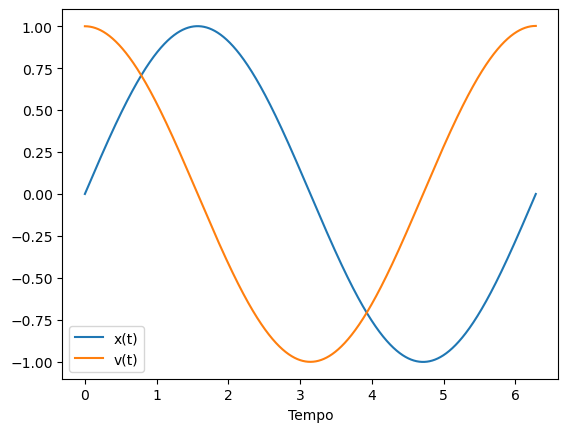

In [1]:
#2c)
import numpy as np
import matplotlib.pyplot as plt

n = 10000
dt = 2 * np.pi / n
x = np.zeros(n+1)
v = np.zeros(n+1)
x[0] = 0
v[0] = 1

for i in range(n):
    x[i+1] = x[i] + v[i]*dt
    v[i+1] = v[i] - x[i]*dt

t = np.linspace(0, 2*np.pi, n+1)
plt.plot(t, x, label='x(t)')
plt.plot(t, v, label='v(t)')
plt.xlabel('Tempo')
plt.legend()
plt.show()

![Ex2](image2.png)

In [ ]:
#3a
# Calcular as três formas da soma para diferentes valores de N

import numpy as np

def S1(N):
    # S_N^{(1)} = sum_{n=1}^{2N} (-1)^n * n / (n+1)
    return np.sum([(-1)**n * n / (n+1) for n in range(1, 2*N+1)])

def S2(N):
    # S_N^{(2)} = -sum_{n=1}^{N} 1/(2n) + sum_{n=1}^{N} 2n/(2n+1)
    parte1 = -np.sum([1/(2*n) for n in range(1, N+1)])
    parte2 = np.sum([2*n/(2*n+1) for n in range(1, N+1)])
    return parte1 + parte2

def S3(N):
    # S_N^{(3)} = 1 - 1/2 + 1/3 - 1/4 + ... + 1/(2N)
    return np.sum([1/(n*(n+1)) for n in range(1, 2*N+1, 2)])

# Testando para diferentes valores de N
valores_N = [10, 100, 1000, 10000]
print(f"{'N':>6} {'S1':>20} {'S2':>20} {'S3':>20}")
for N in valores_N:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)
    print(f"{N:6d} {s1:20.15f} {s2:20.15f} {s3:20.15f}")

     N                   S1                   S2                   S3
    10    0.283609549205525    7.354641295237270    0.668771403175428
   100    0.304371445140072   95.116993927500459    0.690653430481824
  1000    0.306603006815122  992.821132146264745    0.692897243059937
 10000    0.306827821314879 9990.519221785270929    0.693122181184945


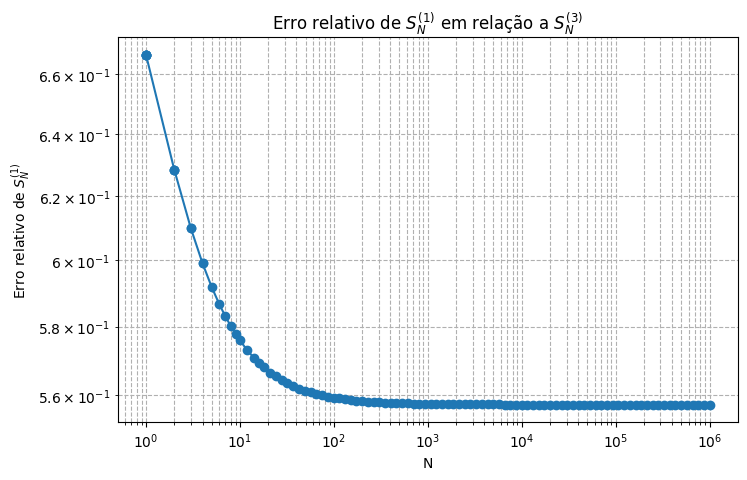

In [ ]:
#3b
# Análise de erro relativo entre S1(N) e S3(N) para N de 1 até 10^6 (escala log-log)

import numpy as np
import matplotlib.pyplot as plt

def S1(N):
    return np.sum([(-1)**n * n / (n+1) for n in range(1, 2*N+1)])

def S3(N):
    return np.sum([1/(n*(n+1)) for n in range(1, 2*N+1, 2)])

# Valores de N em escala logarítmica
Ns = np.logspace(0, 6, num=100, dtype=int)
erro_relativo = []

for N in Ns:
    s1 = S1(N)
    s3 = S3(N)
    erro = np.abs((s1 - s3) / s3)
    erro_relativo.append(erro)

plt.figure(figsize=(8,5))
plt.loglog(Ns, erro_relativo, marker='o', linestyle='-')
plt.xlabel('N')
plt.ylabel('Erro relativo de $S_N^{(1)}$')
plt.title('Erro relativo de $S_N^{(1)}$ em relação a $S_N^{(3)}$')
plt.grid(True, which="both", ls="--")
plt.show()

Respostas para a interpretação do gráfico do erro relativo:

-Sim, existe uma região no gráfico log-log em que o erro relativo se comporta aproximadamente como uma reta, especialmente para valores intermediários de N.

-Esse comportamento indica que o erro relativo é proporcional a uma potência de N, ou seja, segue uma relação do tipo erro ∝ N^p.

-A inclinação aproximada dessa reta (coeficiente angular no gráfico log-log) representa o expoente p dessa potência. Se a inclinação for negativa, o erro diminui com o aumento de N; se for positiva, o erro aumenta. Observando o gráfico, é possível estimar visualmente essa inclinação, que geralmente é constante nessa região reta do gráfico.